In [2]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython

In [4]:
aud_file = librosa.load("../train/9770.wav", sr=None)

In [5]:
type(aud_file)

tuple

In [6]:
len(aud_file)

2

In [7]:
type(aud_file[0]), type(aud_file[1])

(numpy.ndarray, int)

In [8]:
aud_file[1]

44100

In [10]:
IPython.display.Audio("../train/9770.wav")

In [11]:
44100*3

132300

In [12]:
aud_file[0].shape

(132300,)

In [15]:
librosa.get_duration(y=aud_file[0], sr=aud_file[1])

3.0

In [20]:
length = []
for f in os.listdir("../train"):
    aud_file = librosa.load(f"../train/{f}", sr=None)
    length.append(aud_file[0].shape[0]/aud_file[1])

In [21]:
np.max(length)

3.0

In [24]:
for f in os.listdir("../test"):
    aud_file = librosa.load(f"../test/{f}", sr=None)
    length.append(aud_file[0].shape[0]/aud_file[1])

In [25]:
len(length)

9317

In [26]:
np.max(length)

3.0

In [28]:
train_df = pd.read_csv("../train.csv")

In [29]:
train_df.head()

,File Name,Word,Score
0,9770.wav,hylle,1
1,3631.wav,hylle,5
2,7059.wav,hylle,5
3,9878.wav,hylle,3
4,7847.wav,hylle,4


In [30]:
train_hylle = train_df[train_df.Word=='hylle']

In [31]:
train_hylle.head()

,File Name,Word,Score
0,9770.wav,hylle,1
1,3631.wav,hylle,5
2,7059.wav,hylle,5
3,9878.wav,hylle,3
4,7847.wav,hylle,4


In [61]:
train_hylle[train_hylle.Score==3]

,File Name,Word,Score
3,9878.wav,hylle,3
8,4963.wav,hylle,3
14,7812.wav,hylle,3
16,7022.wav,hylle,3
21,0308.wav,hylle,3
23,0507.wav,hylle,3
28,3176.wav,hylle,3
33,4669.wav,hylle,3
35,4583.wav,hylle,3
37,3044.wav,hylle,3


In [33]:
train_hylle[train_hylle.Score==5]

,File Name,Word,Score
1,3631.wav,hylle,5
2,7059.wav,hylle,5
5,9353.wav,hylle,5
6,6686.wav,hylle,5
10,4775.wav,hylle,5
11,2151.wav,hylle,5
12,7050.wav,hylle,5
13,4547.wav,hylle,5
19,4004.wav,hylle,5
20,7368.wav,hylle,5


In [37]:
train_hylle[train_hylle.Score==2]

,File Name,Word,Score
15,3723.wav,hylle,2
27,7811.wav,hylle,2


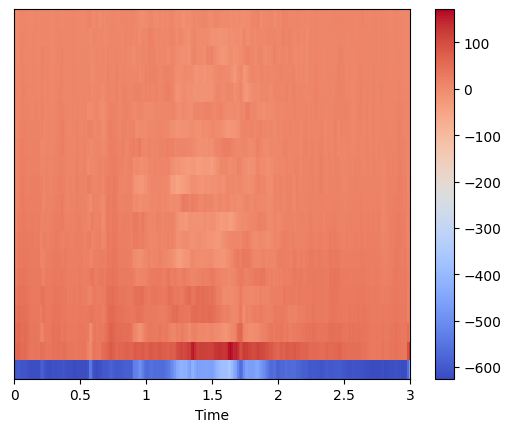

In [52]:
h1 = librosa.load("../train/3631.wav", sr=None)

h1_mfcc = librosa.feature.mfcc(y=h1[0], sr=h1[1])

img = librosa.display.specshow(h1_mfcc, x_axis='time', sr=h1[1])
plt.colorbar()

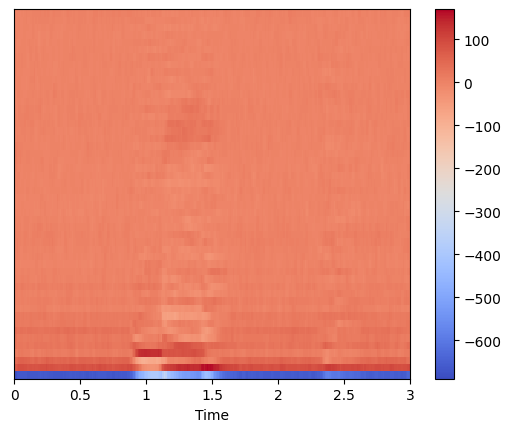

In [64]:
h2 = librosa.load("../train/3044.wav", sr=None)

h2_mfcc = librosa.feature.mfcc(y=h2[0], sr=h2[1], n_mfcc=50)

img2 = librosa.display.specshow(h2_mfcc, x_axis='time', sr=h2[1])
plt.colorbar()

In [65]:
trn_bro = train_df[train_df.Word=="bro"]

In [71]:
trn_bro[trn_bro.Score==3]

,File Name,Word,Score
1934,5745.wav,bro,3
1941,4868.wav,bro,3
1945,6051.wav,bro,3
1956,2560.wav,bro,3
1960,2915.wav,bro,3
1964,2691.wav,bro,3
1970,5482.wav,bro,3
1971,8410.wav,bro,3


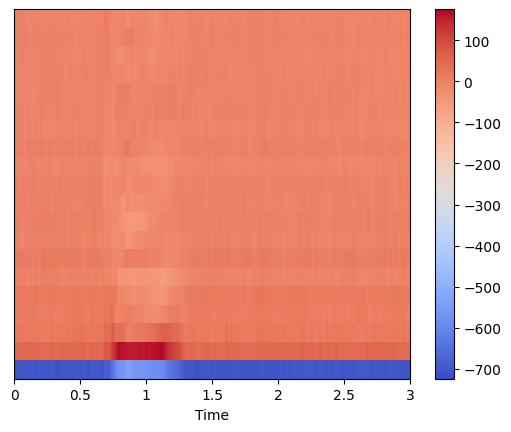

In [73]:
h2 = librosa.load("../train/2560.wav", sr=None)

h2_mfcc = librosa.feature.mfcc(y=h2[0], sr=h2[1], n_mfcc=20)

img2 = librosa.display.specshow(h2_mfcc, x_axis='time', sr=h2[1])
plt.colorbar()

In [74]:
from sklearn.model_selection import train_test_split

In [81]:
train_idxs, test_idxs, ytr, ytest = train_test_split(train_df["File Name"], 
                                               train_df.Score, 
                                               random_state=42, 
                                               stratify=train_df.Score, test_size=0.1)

In [82]:
train_idxs.shape, test_idxs.shape

((7071,), (786,))

In [83]:
train_idxs[:5]

1735    8955.wav
6179    9056.wav
3605    7142.wav
4085    1838.wav
2988    8429.wav
Name: File Name, dtype: object

In [84]:
test_idxs[:5]

1344    6164.wav
7688    0986.wav
6143    3314.wav
3841    2994.wav
7183    4296.wav
Name: File Name, dtype: object

In [88]:
ytr.value_counts(normalize=True)

Score
5    0.302079
4    0.294018
3    0.284825
2    0.102249
1    0.016829
Name: proportion, dtype: float64

In [89]:
ytest.value_counts(normalize=True)

Score
5    0.301527
4    0.293893
3    0.284987
2    0.103053
1    0.016539
Name: proportion, dtype: float64

In [87]:
for fn in train_idxs:
    print(fn)
    break

8955.wav


In [ ]:
[{"word":[]}]